In [33]:
import pandas as pd
import glob
import os
import statistics
from pathlib import Path
from bokeh.models import HoverTool
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('8-920-1941.csv')

None


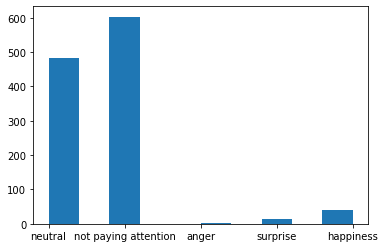

In [34]:
# Paso 1: Frecuencia de lo detectado.
# datos = df['Timestamp'].where(df['Emotion'] == 'not paying attention')
def freqdect():
    path = os.getcwd() +'\*.csv'
    data = pd.DataFrame()
    for fname in glob.glob(path):
        df = pd.read_csv(fname)
        data = data.append(df,ignore_index=True)
    plt.hist(data['Emotion'])
    
print(freqdect())

In [39]:
# Paso 2: Promedio de la clase, para saber que tan interactiva es.
def mean_of_class():    
    path = os.getcwd() +'\*.csv'
    all_means = []
    for fname in glob.glob(path):
        df = pd.read_csv(fname)
        mean = df['Emotion_Value'].mean()
        all_means.append(mean)
    attention = statistics.mean(all_means)
    if attention <0:
        return 'No prestaron at.'
    else:
        return 'Si prestaron at.'

Si prestaron at.


In [38]:
# Paso 3: Analisis de cada estudiante.
def attention_analytics():
    path = os.getcwd() +'\*.csv'
    data = pd.DataFrame()
    for fname in glob.glob(path):
        df = pd.read_csv(fname)
        std = df['Emotion_Value'].std() #Desviacion estandar
        median = df['Emotion_Value'].median() #Media
        mean = df['Emotion_Value'].mean()
        name = Path(fname).stem
        estudiante={'student_id':name,'std':std,'median':median,'mean':mean}
        data = data.append(estudiante,ignore_index=True)
    return data[['student_id','mean','median','std']]
        
    
print(attention_analytics())

   student_id      mean  median       std
0  8-141-1385  0.996332   1.000  0.014698
1  8-357-1002  0.994221   1.000  0.029527
2  8-914-1545  0.995214   0.998  0.009647
3  8-920-1243 -0.098908  -1.000  0.948598
4  8-920-1941 -0.098908  -1.000  0.948598
5  8-969-1941 -0.098908  -1.000  0.948598


In [40]:
# $$$$ EXTRA $$$$
# Un PopUp por si dura 10 minutos un estudiante estando perdido.
def perdidox(df):
    count = 0
    for value in df['Emotional_Value']:
        if value == -1:
            count+=1
        else:
            count = 0
    if count>=50:
        return 'Mandar alerta'
    else:
        return 'No mandar alerta'

In [35]:
# Time series
y_line = 'Emotion_Value'

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("Timestamp", "@Timestamp"),
    ("Emotion", "@Emotion")
]
)
p = figure(title='Estudiante' ,x_axis_label='Id',y_axis_label='Emotion_Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.line('index',y_line, line_width=2, source=df)
show(p)